## Task 2: Clustering with Unsupervised Machine Learning
### Name: Annan Dejene Deriba

- The dataset provided for this task is the "Iris" dataset.
- The task is predict the optimum number of clusters and represent it visually.
- I used K-Means and Hierarchical Clustering for this task; I used the elbow method and dendrogram respectively to find the optimum number of clusters.

In [1]:
# Importing the neccessary libraries for this task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the Iris dataset 
data = sns.load_dataset("iris")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Exploring the dataset

In [3]:
# To get the dimension of our data
data.shape

(150, 5)

In [4]:
# To get the number of null values in each column
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- We can see that there are no null values in our dataset that need to be accounted for in later analysis.

In [5]:
# To get a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- We can see that there are 5 columns, 150 records, the first 4 columns are of type `float64` while the least one have `object` dtype.

In [6]:
# To get a basic statistical description of the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


- Here we can notice the following things:
 - Mean values show that sepal and petal lengths are relatively large when compared to their respecitve width measurment.
 - Overall sepal measurments are larger than petal measurments. 
 - So we can say that an iris flower generally have smaller petals than sepals and both are longer than they're wide.
 - The mean and median values of the sepal measurments are very close to eachother and the standard deviation is lessthan 1, this suggests that the data points are close to the mean.
 - The mean and median values of the petal measurments are not as close as the values for the sepal measurements, this suggests that there is more variance in the petal measurments.

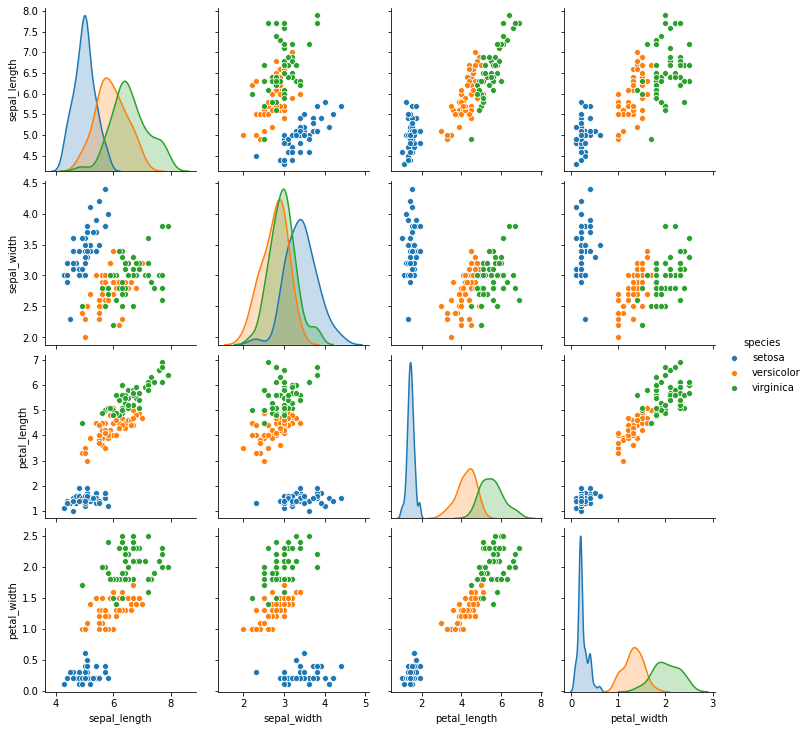

In [7]:
# To plot pairwise relationship between the numerical column and hue of the species.
sns.pairplot(data, hue="species");

- We can see that `setosa (blue)` species appear to separate from the other species in all the scatter plot combination; but they tend to be very distnict in the petal measurment when compared to the sepal measurments. 
- There is a bit of an overlap between `versicolor (orange)` and `virginica (green)`, specially in the sepal measurments.
- Setosa appears to be smaller than the other species in Petal length, Petal width and sepal length; it can also be observed in the histograms, the setosa data is closer to the left than the other sepecies' measurment.
- `Virginica(green)` and `Versicolor (orange)` aren't cleanly distnict from one another but there is a pattern which `virginica (green)` tend to have longer and wider petals than `versicolor (orange)`.

In [8]:
# To get the correlation between numerical columns
data.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


- Here we can notice that:
 - Petal length and petal width have high positive correlation (0.96), which implies that as the petal length increases so does the petal width. They have a very close relationship.
 - Sepal length and speal width have very weak relationship (-0.11).
 - Petal length and petal width have high positive correlation with Sepal length (0.87 and 0.81 respectively).
 - Petal length and petal width have negative correlation with Speal width (-0.42 and -0.36).

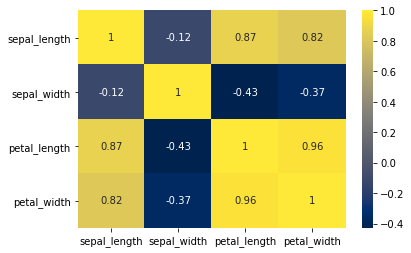

In [9]:
# Visualizing correlations with heatmap
sns.heatmap(data.corr(), annot=True, cmap="cividis");

- The above visualization is the visual description of the correlation between the numerical columns. The yellower the box the more correlated the features are and the dark blue the boxes are the less correlated the features are.

### Data Preparation

In [10]:
X = data.iloc[:, [0,1,2,3]]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Clustering

### 1. K-Means Clustering

#### Finding the optimal number of clusters using the Elbow Method.

In [11]:
from sklearn.cluster import KMeans

wcss = []
k = range(1,6)

for i in k:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

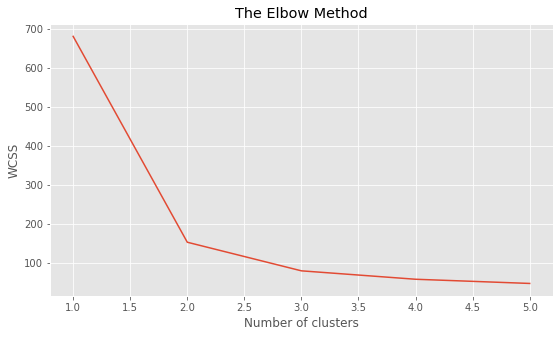

In [12]:
plt.rcParams["figure.figsize"] = 9, 5
plt.style.use("ggplot")

plt.plot(k, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

- From the above graph we can see that the optimum number of clusters is 3, from the elbow method the optimum clusters is where the elbow occurs or the point where the With in Cluster Sum of Squares (WCSS) doesn't decrease significantly.

#### Applying K-Means to the dataset with k=3

In [13]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

In [14]:
pred_clust = kmeans.fit_predict(X)
pred_clust

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

#### Visualizing the clusters created by K-Means

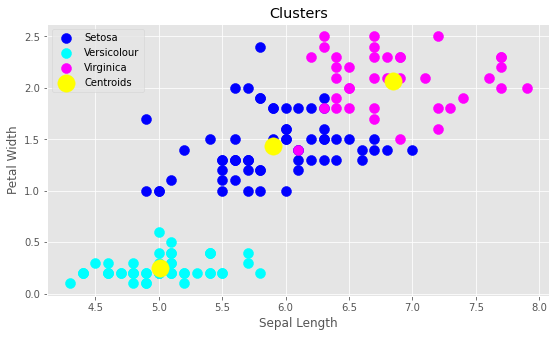

In [15]:
# Visualising the clusters - On the first and the last columns
plt.scatter(X.iloc[pred_clust == 0, 0], X.iloc[pred_clust == 0, -1], s = 100, c = 'blue', label = 'Setosa')

plt.scatter(X.iloc[pred_clust == 1, 0], X.iloc[pred_clust == 1, -1], s = 100, c = 'cyan', label = 'Versicolour')

plt.scatter(X.iloc[pred_clust == 2, 0], X.iloc[pred_clust == 2, -1],s = 100, c = 'magenta', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,-1], s = 300, c = 'yellow', label = 'Centroids')

plt.legend()

# Adding labels
plt.title("Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width");

### 2. Hierarchical Clustering

#### Using the dendrogram to find the optimal number of clusters

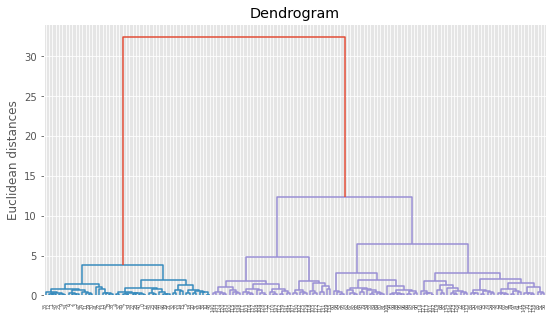

In [16]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.ylabel('Euclidean distances');

- From the dendrogram the optimal number of cluster is 3; same as the one we found from K-Means elbow method.

#### Applying Hierarchical Clustering to the dataset with n_clusters=3

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')

In [18]:
pred_clust = hc.fit_predict(X)
pred_clust

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

#### Visualizing the clusters created by the Hierarchical Clustering algorithm

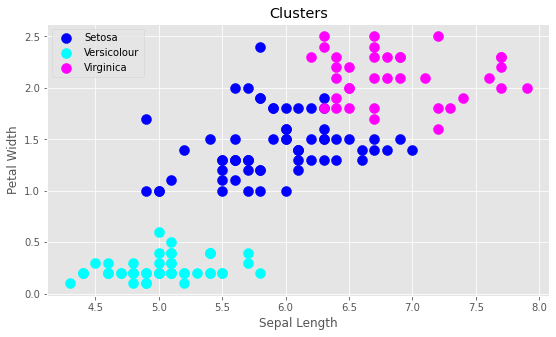

In [19]:
# Visualising the clusters - On the first and the last columns
plt.scatter(X.iloc[pred_clust == 0, 0], X.iloc[pred_clust == 0, -1], s = 100, c = 'blue', label = 'Setosa')

plt.scatter(X.iloc[pred_clust == 1, 0], X.iloc[pred_clust == 1, -1], s = 100, c = 'cyan', label = 'Versicolour')

plt.scatter(X.iloc[pred_clust == 2, 0], X.iloc[pred_clust == 2, -1],s = 100, c = 'magenta', label = 'Virginica')

plt.legend()

# Adding labels
plt.title("Clusters")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Width");

- The clusters created by Hierarchical Clustering are pretty much the same as the ones created by the K-means clustering algorithm.